In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
x,y = df.drop(['Purchased'], axis=1), df['Purchased']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=6)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[50,  2],
       [12, 16]], dtype=int64)

<Axes: >

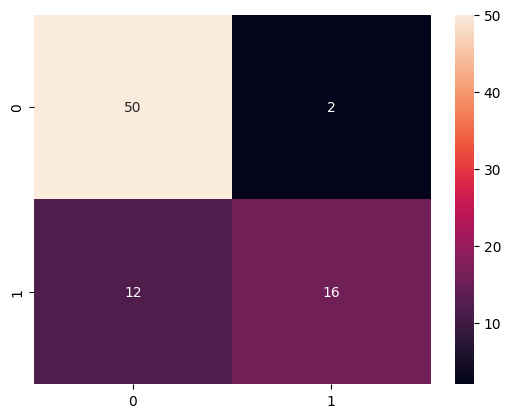

In [26]:
sns.heatmap(cm, annot=True)

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Accuracy : ', accuracy_score(y_test, y_pred)*100,'%')
print("Precision : %f" % precision_score(y_test, y_pred))
print("Recall : %f" % recall_score(y_test, y_pred))
print("f1 : %f" % f1_score(y_test, y_pred))

Accuracy :  82.5 %
Precision : 0.888889
Recall : 0.571429
f1 : 0.695652
